# Graphs

## Imports

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Global Values

In [8]:
NUMBER_TORNADOS = 108 #Number of Tornado Events
NUMBER_DAYS = 57 #Number of days of data per Tornado
FILE_NAME = "/Users/frazierhorn/GithubProjects/CS506Spring2021Repository/NaturalDisasterProject/Deliverable_1/historical_data_fin.csv" #CSV file that contains the data


## Loading Data

In [9]:
#Field 0: 'datatime'
#Field 1: 'temperature'
#Field 2: 'windspeed'
#Field 3: 'surface solar radiation'
#Field 4: 'relative humidity'
#Field 5: 'surface pressure'
#Field 6: 'total precipitation'
#Field 7: 'latitude'
#Field 8: 'longitude'


data = pd.read_csv (FILE_NAME,header=None)

#Take data to numPy
numData = data.to_numpy()


## Helper functions

In [10]:
#Returns all elements of all Tornadoes for a specific field (0-8)
def getAllDataByField(field): 
    
    return numData[1:,field:field+1]

#Returns elements of a given field (0-8) for a particular Tornado (0-107)
def getDataByFieldAndIndex(field, event):
    
    return numData[1+(NUMBER_DAYS*event):(NUMBER_DAYS*(event+1)+1),field:field+1]


#### Sample Data Graph
##### Solar Radiation leading to Tornado 0

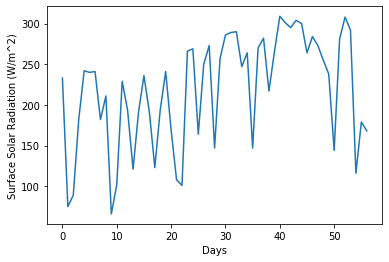

In [15]:
plt.ylabel("Surface Solar Radiation (W/m^2)")
plt.xlabel("Days")
plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(3,0).astype(np.float).flatten())

plt.show()

## Solar Radiation

### Linear graph of Solar Radiation for all Tornados

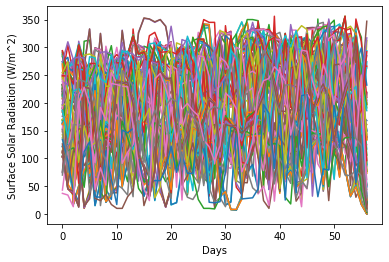

In [16]:
plt.ylabel("Surface Solar Radiation (W/m^2)")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(3,i).astype(np.float).flatten())
plt.show()

### Linear graph of Net Solar Radiation for all Tornados

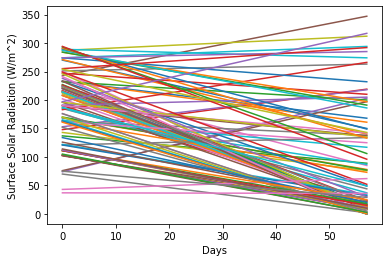

In [17]:
plt.ylabel("Surface Solar Radiation (W/m^2)")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(3,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(3,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Solar Radiation across all Tornados 

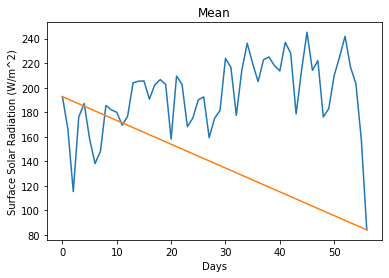

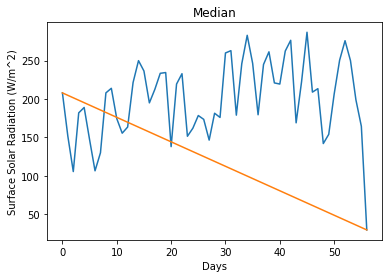

In [18]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(3), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Surface Solar Radiation (W/m^2)")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Surface Solar Radiation (W/m^2)")
plt.xlabel("Days")
plt.show()

### Net Positive Solar Radiation vs Net Negative Solar Radiation

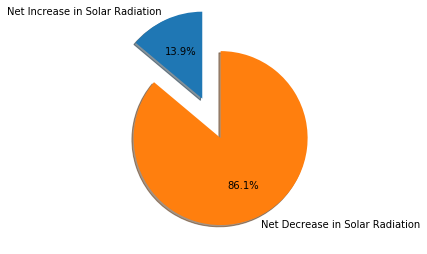

In [19]:
labels = ['Net Increase in Solar Radiation','Net Decrease in Solar Radiation']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(3,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(3,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()     